# Basic Gradient Descent

Gradient descent is an important algorithm for minimizing a function.  Having an algorithm to minimize a function is quite powerful:  you can maximize a function $f$ by minimizing $-f$ and you can solve a system of equations $f_1=k_1, f_2=k_2, \cdots f_r=k_r$ by minimizing $(f_1-k_1)^2+(f_2-k_2)^2+\cdots (f_r-k_r)^2$.  

Here's an example, in one variable, implemented in python, from <a href="https://en.wikipedia.org/wiki/Gradient_descent#Computational_examples">https://en.wikipedia.org/wiki/Gradient_descent#Computational_examples</a>.  The program finds the minimum of
$ f(x) =x^4−3x^3+2. $

In [1]:
# From calculation, it is expected that the local minimum occurs at x=9/4

cur_x = 6 # The algorithm starts at x=6
gamma = 0.01 # step size multiplier
precision = 0.00001
previous_step_size = cur_x

def df(x):
    return 4 * x**3 - 9 * x**2

while previous_step_size > precision:
    prev_x = cur_x
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)

print("The local minimum occurs at %f" % cur_x)

The local minimum occurs at 2.249965


To explain how gradient descent works and visualize the algorithm geometrically, it will help to recall a bit about gradients.

## A quick review about gradients and two important facts

The gradient of a differentiable function $g:\mathbb{R}^n \to \mathbb{R}$ is defined to be the unique vector field $\nabla g$ with the property that for each point $x\in \mathbb{R}^n$, $$\langle \nabla g(x), v\rangle = D_v g(x).$$
Here, $\langle \, , \, \rangle$ denotes the inner product (dot product) of vectors and $D_v g(x)$ denotes the directional derivative of $g$ at the point $x$ in the direction $v$:
$$D_v g(x)=\lim_{h \to 0} \frac{g(x+hv)-g(x)}{h}.$$
In standard coordinates, the gradient can be computed as
$$\nabla g(x)=\left [ \frac{\partial g}{\partial x_0} (x), \frac{\partial g}{\partial x_1} (x), \ldots, \frac{\partial g}{\partial x_{n-1}} (x) \right].$$

### Steepest Descent

Recall that $\langle v,w \rangle=\|v\|w\| \cos(\theta)$ where $\theta$ is the angle between the vectors $v$ and $w$.  Therefore, if $v$ is a unit vector, 

$$D_v g(x)=\langle \nabla g(x), v\rangle =\|\nabla g(x)\| \cos(\theta)$$

is maximized when $v$ points in the direction of the gradient $\nabla g(x)$ and minimized when $v$ points in the direction $-\nabla g(x)$.

<strong>Conclusion</strong> $-\nabla g(x)$ is the direction of steepest descent for the function $g$ at the point $x$.

### Perpendicular to level curves

The level set of $g:\mathbb{R}^n \to \mathbb{R}$ of level $k\in \mathbb{R}$ is defined to be the set

$$g^{-1}(k)=\{(x_0,x_1,  \ldots, x_{n-1})\in \mathbb{R}^n: g(x_0,x_1,  \ldots, x_{n-1})=k\}$$

If $:\alpha: t\mapsto (x_0(t),x_1(t),  \ldots, x_{n-1}(t))$ is a curve in a level set of $g$, then the the function $\mathbb{R} \overset{\alpha}{\to} \mathbb{R}^n \overset{g}{\to} \mathbb{R}$ is constant and hence has zero derivative.  Keeping the multivariable chain rule in mind, we have

$$Dg \circ d\alpha = 0 \Longleftrightarrow \begin{bmatrix} \frac{\partial g}{\partial x_0} (x)& \frac{\partial g}{\partial x_1} (x)& \ldots & \frac{\partial g}{\partial x_{n-1}} (x) \end{bmatrix} \begin{bmatrix} x_0'(t) \\ x_1'(t) \\ \vdots \\ x_{n-1}'(t)\end{bmatrix} = 0.$$

In other words, the gradient $\nabla g(x)$ is perpendicular to the level sets of $g$.



Now, let's do some programming.

## Import modules

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

The following line is a Jupyter code that tells matplotlib to display graphics inline within the jupyter notbook

In [3]:
%matplotlib inline

Define a function

In [4]:
def f(x):
    return  x**4 - 3 * x**3+2

Here's how to evaluate this function at a number, say $2$.

In [5]:
f(2)

-6

To plot this function, we make a bunch of (x,y) coordinates on the graph.  Before doing this, let's take a look at ways we can operate on elements in a list.

In [6]:
x = np.linspace(0,3,7) # make an array of 7 evenly spaced numbers between 0 and 5
print x

[ 0.   0.5  1.   1.5  2.   2.5  3. ]


In [7]:
y=x**2 # squares every number in the list
print(y)

[ 0.    0.25  1.    2.25  4.    6.25  9.  ]


'scatter' plots the points as dots

/ext/sage/sage-8.0/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


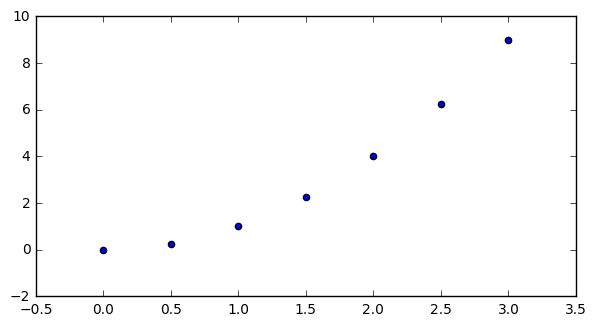

In [8]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7])
axes.scatter(x,y);

and 'plot' connects the dots with straight lines.

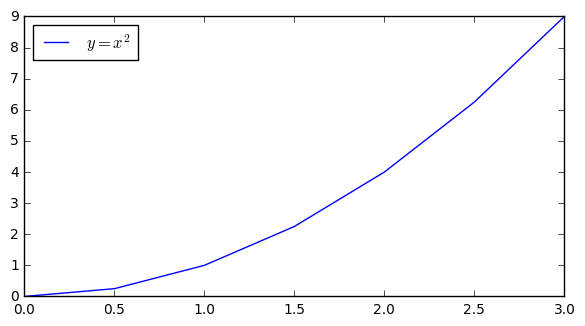

In [9]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7])
axes.plot(x,y, label=r'$y = x^2$')
axes.legend(loc=2); # upper left corner;

To get a better picture, we'll use a lot more points.

In [10]:
x = np.linspace(0,6,1001)
y = f(x)

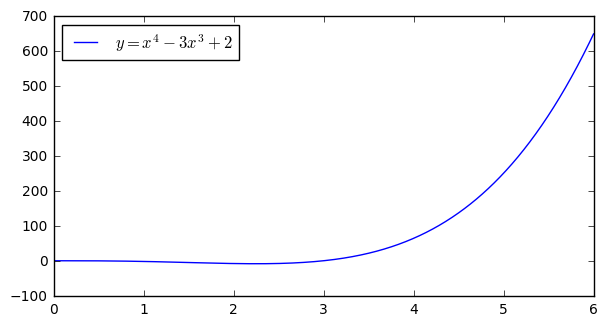

In [11]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7])
axes.plot(x,y, label=r'$y = x^4 - 3  x^3+2$')
axes.legend(loc=2); # upper left corner;

Now, back to gradient descent.

In [12]:
cur_x = 6 # The algorithm starts at x=6
gamma = 0.01 # step size multiplier
precision = 0.00001
previous_step_size = cur_x

x_list = [cur_x]; y_list = [f(cur_x)]

def df(x):
    return 4 * x**3 - 9 * x**2

while previous_step_size > precision:
    prev_x = cur_x
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)
    x_list.append(cur_x)
    y_list.append(f(cur_x))

print "Local minimum occurs at:", cur_x
print "Number of steps:", len(x_list)
print "Minimum value:", f(cur_x)

Local minimum occurs at: 2.24996460743
Number of steps: 71
Minimum value: -6.54296873732


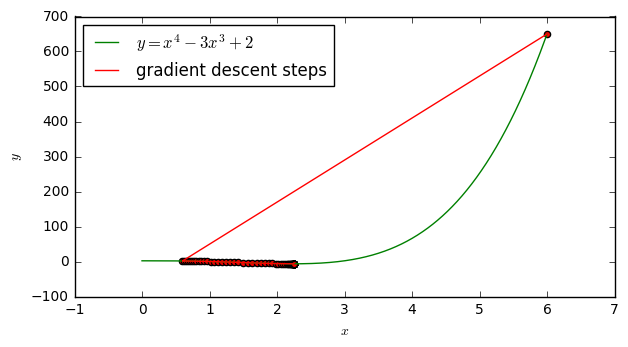

In [13]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7]) # left, bottom, width, height (range 0 to 1)
axes.plot(x,y, 'g', label=r'$y = x^4-3x^3+2$') # g for green
axes.scatter(x_list,y_list,c="r")
axes.plot(x_list,y_list,c="r",label='gradient descent steps')
axes.legend(loc=2); # upper left corner
axes.set_xlabel('$x$')
axes.set_ylabel('$y$') ;

Let's take a closer look:

In [14]:
xzoom = np.linspace(0,2.5,100)
yzoom=f(xzoom)

matplotlib.rcParams.update({'font.size': 12, 'text.usetex': True})

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7]) # left, bottom, width, height (range 0 to 1)
axes.plot(xzoom,yzoom, 'g', label=r'$y = x^4-3x^3+2$') # g for green
axes.scatter(x_list[8:],y_list[8:],c="r")
axes.plot(x_list[8:],y_list[8:],c="r",label='gradient descent steps')
axes.legend(loc=1); # upper right corner
axes.set_xlabel('$x$')
axes.set_ylabel('$y$') ;

## 2 dimensional example

Here we consider a function $g:\mathbb{R}^2 \to \mathbb{R}$ defined by $g(x_0,x_1)=3(x_0-2)^2+(x_1-1)^2$.  We define $g$ as a function of $x$, where $x$ should be a list $[x_0,x_1].$

In [15]:
def g(x):
    return 3*(x[0]-2)**2+(x[1]-1)**2+5

In [16]:
def grad_g(x):
    return np.array([6*(x[0]-2), 2.0*(x[1]-1)])

In [17]:
x_old = np.array([0,4])
h = 0.1 # step size
precision = 0.001

x_list = [x_old]
z_list = [g(x_old)]

x_new = x_old - h * grad_g(x_old)
x_list.append(x_new)
z_list.append(g(x_new))

while (abs(x_new[0] - x_old[0])+abs(x_new[1] - x_old[1])) > precision:
    x_old = x_new
    direction = - grad_g(x_old)
    x_new = x_old + h * direction
    x_list.append(x_new)
    z_list.append(g(x_new))
print "Local minimum occurs at:", x_new
print "Number of steps:", len(x_list)
print "minimum value is:", g(x_new)

Local minimum occurs at: [ 2.          1.00371382]
Number of steps: 31
minimum value is: 5.00001379246


In [18]:
x0 = np.linspace(-1,6,100)
x1 = np.linspace(-2,5,100)
X0, X1 = np.meshgrid(x0,x1)
Z=g([X0,X1])

In [19]:
x0_coordlist=np.array(x_list)[:,0]
x1_coordlist=np.array(x_list)[:,1]
z_coordlist=np.array(z_list)

In [20]:
plt.figure()
plt.contour(X0,X1,Z,50) # this plots level sets
plt.plot(x0_coordlist,x1_coordlist,c="r"); # here is the gradient path

AttributeError: Unknown property rcount

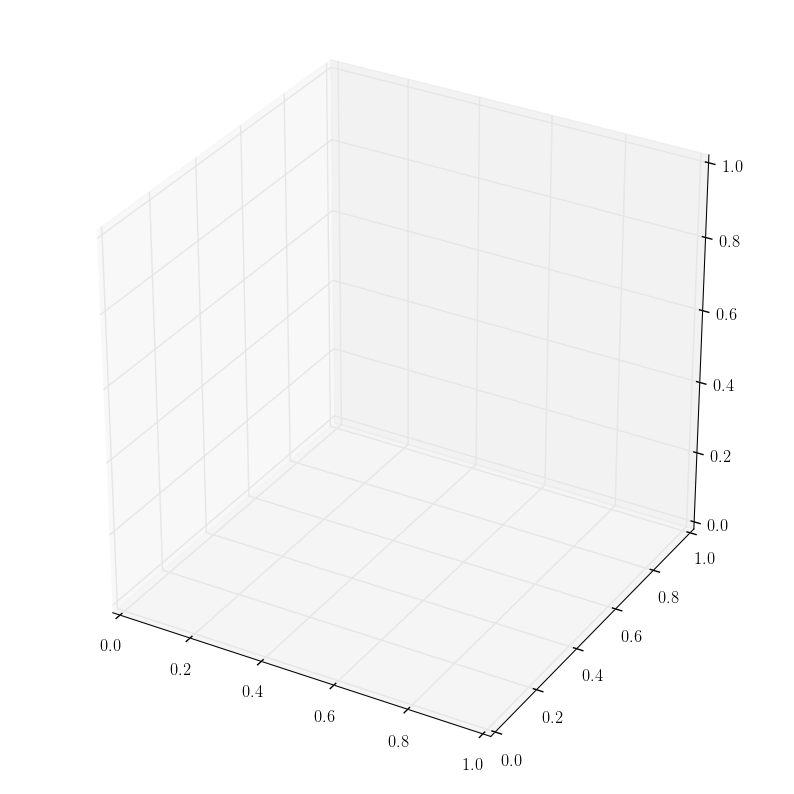

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(1,1,1, projection='3d')
#ax=gca(projection='3d')
#fig = plt.figure()
ax = fig.gca (projection='3d')
ax.plot_wireframe(X0, X1, Z, rcount=10, ccount=10);
ax.plot_surface(X0, X1, Z, alpha=0.25)
ax.plot(x0_coordlist,x1_coordlist,z_coordlist,c="r")
ax.view_init(20, -80)

# Homework

Suppose that you have data consisting of points in the $x$-$y$ plane

$$(x_0,y_0),(x_1,y_1),\ldots, (x_N,y_N)$$

and you'd like to find a degree $d$ polynomial $p(x)=a_0 +a_1 x +a_2 x^2 + \cdots + a_d x^d$ that best fits the data.

One way to proceed is to think of the coefficients $a_0, \ldots, a_d$ of the polynomial as variables and to minimize the function 

$$C(a_0, \ldots, a_d)=\sum_{i=0}^N (y_i - p(x_i))^2.$$

Your problem: find the best degree $5$ polynomial that fits the data from the file datafile.npy.

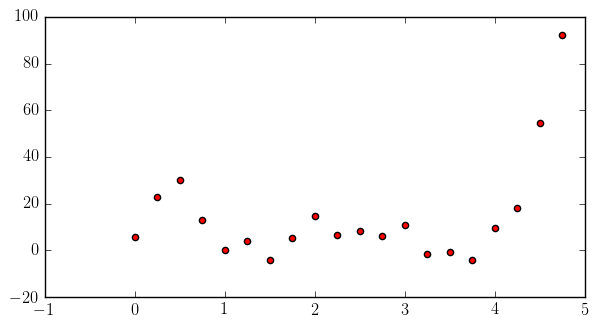

In [22]:
# load the data:
data=np.load('datafile.npy')
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7]) 
axes.scatter(data[:,0],data[:,1],c="r");

In [24]:
data

array([[  0.        ,   5.85953121],
       [  0.25      ,  22.88309989],
       [  0.5       ,  30.38942188],
       [  0.75      ,  13.21021289],
       [  1.        ,   0.32720096],
       [  1.25      ,   3.97301535],
       [  1.5       ,  -3.90770545],
       [  1.75      ,   5.3292406 ],
       [  2.        ,  14.74408003],
       [  2.25      ,   6.78220144],
       [  2.5       ,   8.31606066],
       [  2.75      ,   6.03781717],
       [  3.        ,  11.00363366],
       [  3.25      ,  -1.53629526],
       [  3.5       ,  -0.58868123],
       [  3.75      ,  -4.30375877],
       [  4.        ,   9.41031136],
       [  4.25      ,  18.14232431],
       [  4.5       ,  54.81734958],
       [  4.75      ,  92.26249149]])